Notre objectif est d'aider les gynécologues à déterminer les facteurs à risque d’accouchement prématuré et pouvoir entre autre de savoir si la future maman en question aura réellement besoin d’un accouchement prématuré.



In [18]:
import pandas as pd
import numpy as np

Le fichier "Accouchement.xls" porte sur les facteurs prénataux (médicaux et de personne) liés à un accouchement prématuré chez les femmes déjà en travail prématuré.


 Télécharger les données 

In [3]:
from google.colab import files
data_to_load = files.upload()

#import io
#df = pd.read_csv(io.BytesIO(data_to_load['Accouchement.csv']))

Saving Accouchement.xls to Accouchement.xls


In [19]:
import io
dt = pd.read_excel(io.BytesIO(data_to_load['Accouchement.xls']), header=0)

GEST: l'âge gestationnel en semaines à l'entrée dans l'étude DILATE: la dilatation du col en cm EFFACE: l’effacement du col (en %) CONSIS: la consistance du col (1= mou, 2= moyen, 3=ferme) CONTR: la présence (=1) ou non (=2) de contraction MEMBRAN: les membranes rupturées (=1) ou non (=2) ou incertain (=3) AGE: l’âge de la patiente STRAT: période de la grossesse GRAVID: la gestité (nombre de grossesses antérieures y compris celle en cours) PARIT: la parité (nombre de grossesses à terme antérieures) DIAB: la présence (=1) ou non (=2) d'un problème de diabète, ou valeur manquante (=9) BEBAGE: âge gestationnel (en jours) du bébé à la naissance TRANSF: le transfert (1) ou non (2) vers un hôpital en soins spécialisés GEMEL: grossesse simple (=1) ou multiple (=2) 

In [20]:
dt.head()

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,STRAT,GRAVID,PARIT,DIAB,TRANSF,GEMEL,PREMATURE
0,31,3,100,3,1,2,26,3,1,0,2,2,1,positif
1,28,8,0,3,1,2,25,3,1,0,2,1,2,positif
2,31,3,100,3,2,2,28,3,2,0,2,1,1,positif
3,27,2,75,3,2,2,27,2,2,1,2,1,2,positif
4,28,6,75,3,2,2,17,3,1,0,2,1,1,positif


# 13 variables ont été retenues pour 390 femmes enrôlées dans l'étude.

In [24]:
print(dt.shape)

(390, 14)


In [25]:
print(dt['PREMATURE'].unique())

['positif' 'negatif']


In [26]:
print(dt.groupby('PREMATURE').size())

PREMATURE
negatif    124
positif    266
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


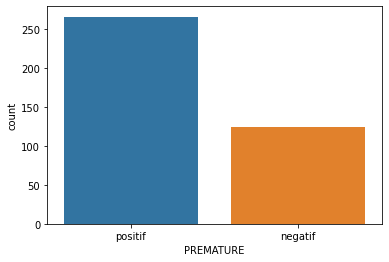

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.countplot(dt['PREMATURE'],label="Count")
plt.show()

#Diviser les données en données d'apprentissage et données de test 

In [22]:
X= dt.iloc[:,0:13].values
y= pd.factorize(dt['PREMATURE'])[0]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Centrage Réduction des données avec la méthode  MinMaxScaler(): appliquer la fonction (xi-xmin)/(xmax-xmin)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#1) Appliquer k-Nearest Neighbors 

In [25]:
from sklearn.neighbors import KNeighborsClassifier


# Choisir le nombre de voisins optimal

Text(0, 0.5, 'Erreur')

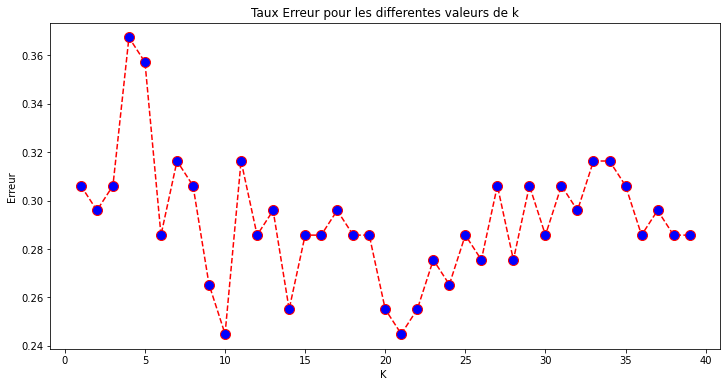

In [26]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
# Tester k de 1 à 40 et la distance Manhattan
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

Choisir le nombre de voisins le plus optimal

In [27]:
knn = KNeighborsClassifier(5)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

Evaluer les performances du modèle sur les données de Test avec les indicateurs de performance: Matrice de confusion, Bonne Classification et Score F1

In [28]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.74


In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[50 15]
 [10 23]]


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        65
           1       0.61      0.70      0.65        33

    accuracy                           0.74        98
   macro avg       0.72      0.73      0.72        98
weighted avg       0.76      0.74      0.75        98



# 2) Les arbres de décision: Appliquer CART

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [32]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc_model.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc_model.score(X_test, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.64


In [33]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()
export_graphviz(dtc_model, out_file=dot_data)
#graph=pydot.graph_from_dot_data(dot_data.getvalue())
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree.png")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dtc))

[[51 14]
 [21 12]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        65
           1       0.46      0.36      0.41        33

    accuracy                           0.64        98
   macro avg       0.58      0.57      0.58        98
weighted avg       0.63      0.64      0.63        98



## **3) Random forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [37]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6632653061224489


In [38]:
#Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline

from sklearn.metrics import roc_curve, auc

In [39]:
#roc pour KNN
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_knn)
roc_auc2 = auc(fpr2, tpr2)

In [40]:
#roc pour CART
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_dtc)
roc_auc3 = auc(fpr3, tpr3)

In [41]:
#roc pour RandomForest
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred)
roc_auc4 = auc(fpr4, tpr4)

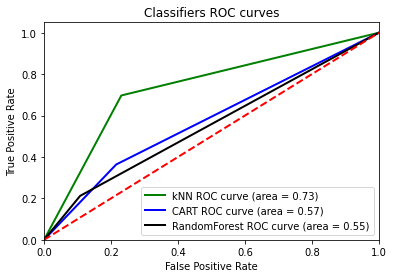

In [43]:
plt.figure() 
plt.plot(fpr2, tpr2, color='green', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='blue', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='black', lw=2, label='RandomForest ROC curve (area = %0.2f)'% roc_auc4)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()